In [1]:
import motor_proteins as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import csv
import glob
from scipy.ndimage import gaussian_filter1d
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, Layout, interactive
from scipy.optimize import minimize


k401

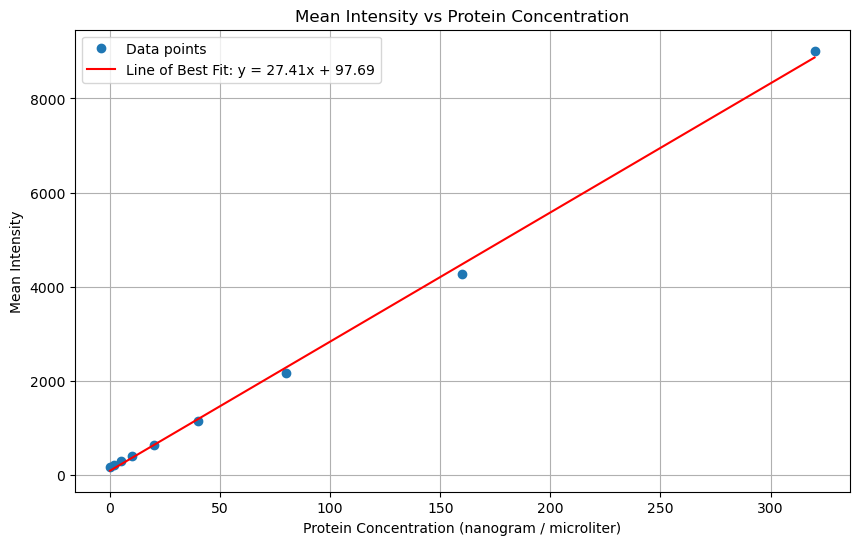

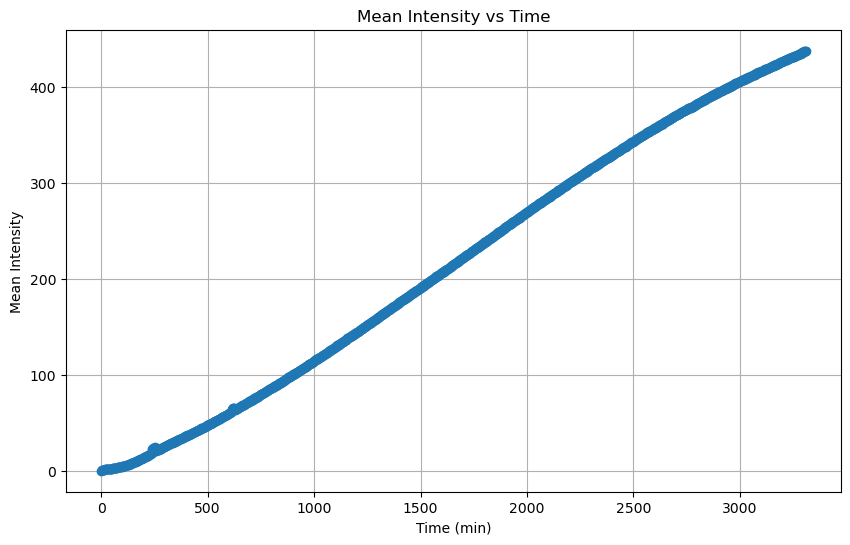

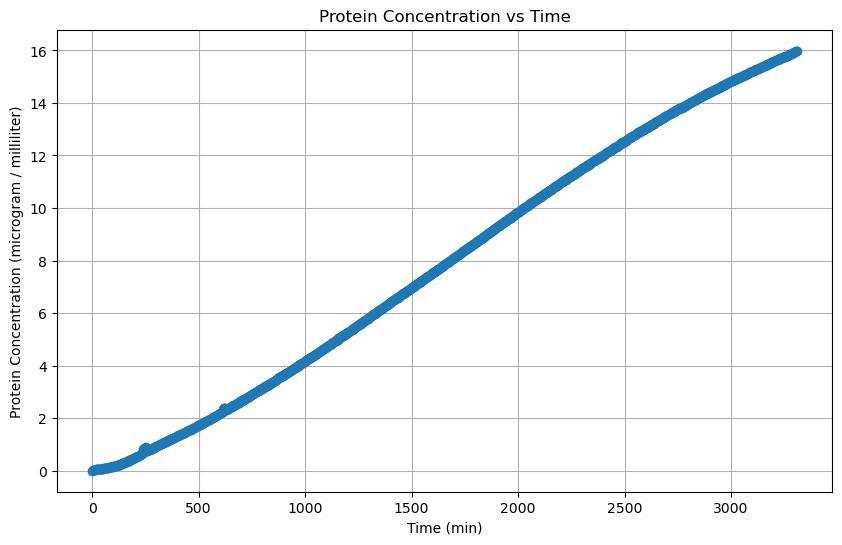

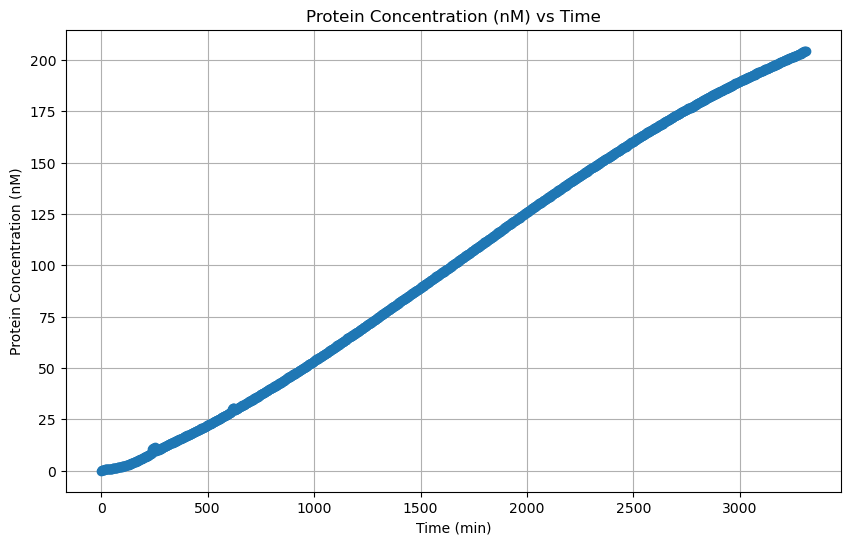

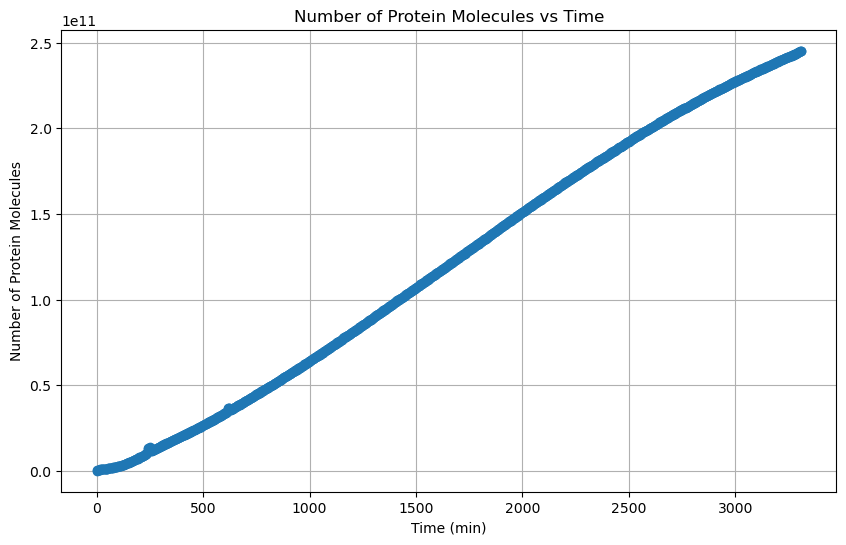

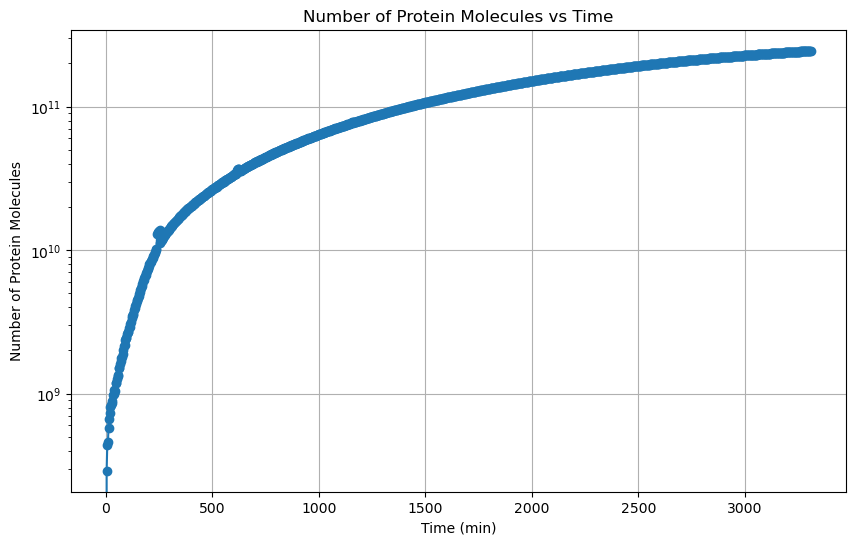

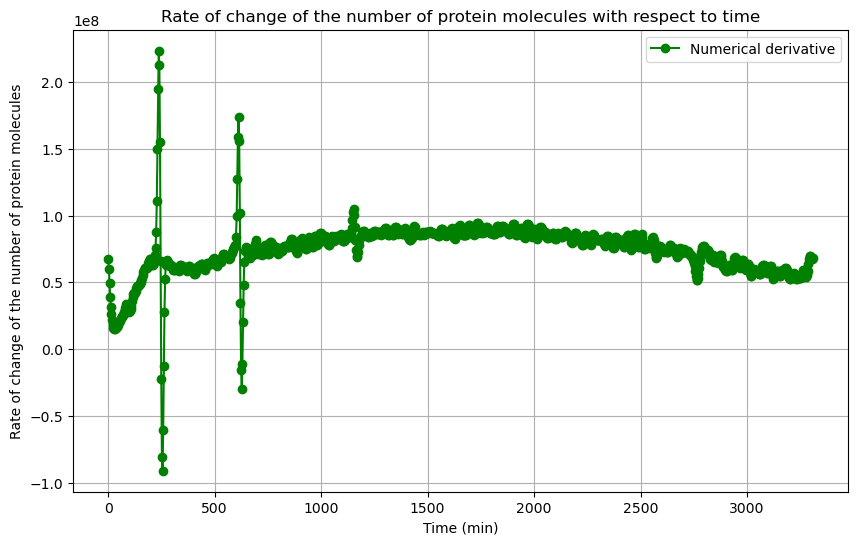

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.979499579143322
k_TX: 0.23981885558343663
R_p: 30.012279378095684
tau_m: 718.0525041804935
K_TL: 5.001504771590312
R: 79.9736329942682
k_deg: 0.0
X_p: 0.4526164798807031
K_p: 3.95271010483593
tau_0: 0.0002475562954105115
tau_f: 298.7516978291736

This is the model whose optimized parameters were found using the provided initial guesses:


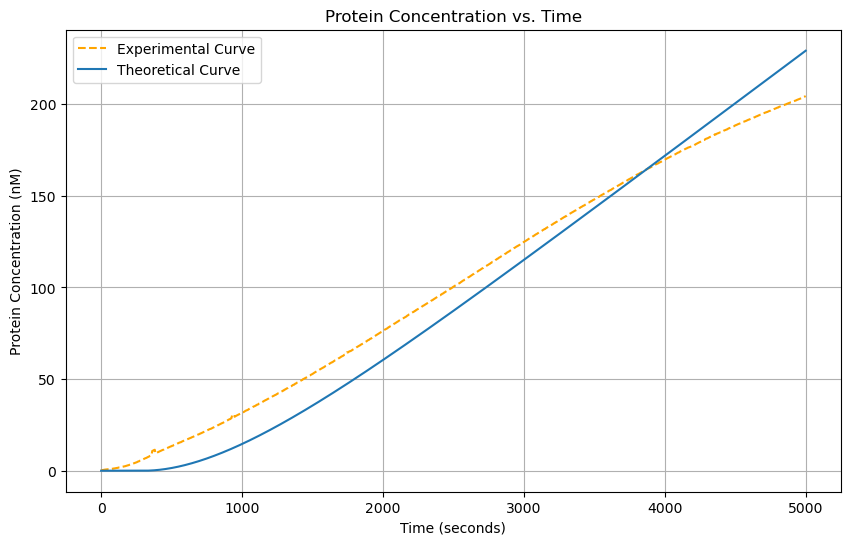

interactive(children=(FloatSlider(value=9.979499579143322, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=5.341938302979507, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.649405238071061, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=17.100216333147834, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.972393111958048, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=8.942275363645116, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 8.942275363645116
k_TX: 0.9156541379912752
R_p: 29.97116518842725
tau_m: 692.9205529913768
K_TL: 4.448557435500469
R: 59.15328279150151
k_deg: 0.1504589096630866
X_p: 1.07493010365269
K_p: 22.005383651562923
tau_0: 0.0004243825055896
tau_f: 71.87246298169293

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=12.028177233135048, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 8.942275363645116
k_TX: 0.9156541379912752
R_p: 29.97116518842725
tau_m: 692.9205529913768
K_TL: 4.448557435500469
R: 59.15328279150151
k_deg: 0.1504589096630866
X_p: 1.07493010365269
K_p: 22.005383651562923
tau_0: 0.0004243825055896
tau_f: 71.87246298169293


In [2]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/k401-activedrops/img_*********_gfp-4x_000.tif")) # The paths must be sorted
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif")) # These paths must also be sorted

# Provide your specific values for N_p, N_m, D, and initial guesses - Known data
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters -- Reasonable guesses
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # Protein production rate (molecules/s)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (units)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0     # Initial time delay (s)
tau_f = 300    # Final time delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
mp.runFullAnalysis(paths, calibration_curve_paths, 3, 2, 78.2, N_p, N_m, D, initial_guesses, "experimentalData_k401.csv", "optimizedParameters_k401.csv")

kif3

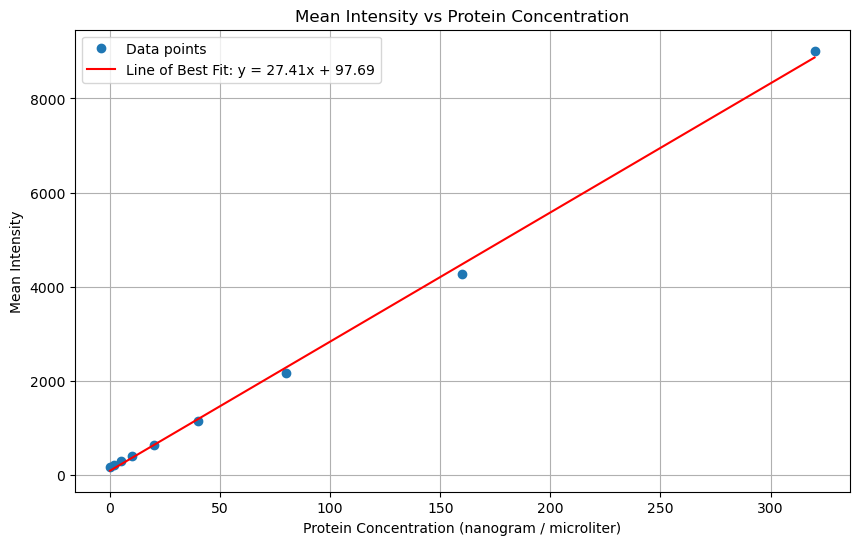

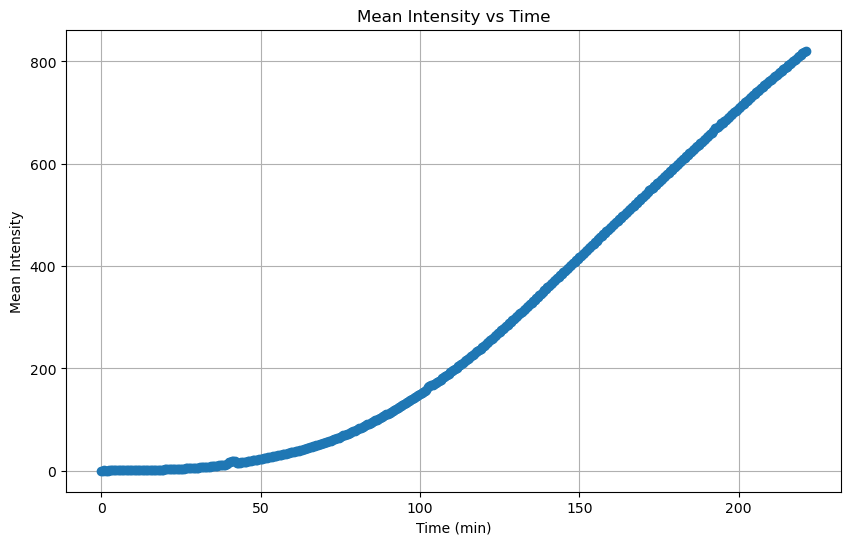

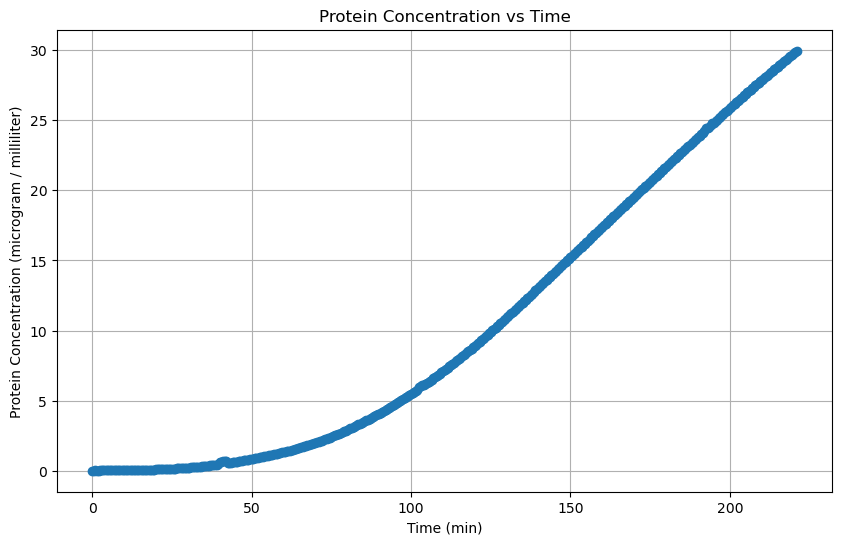

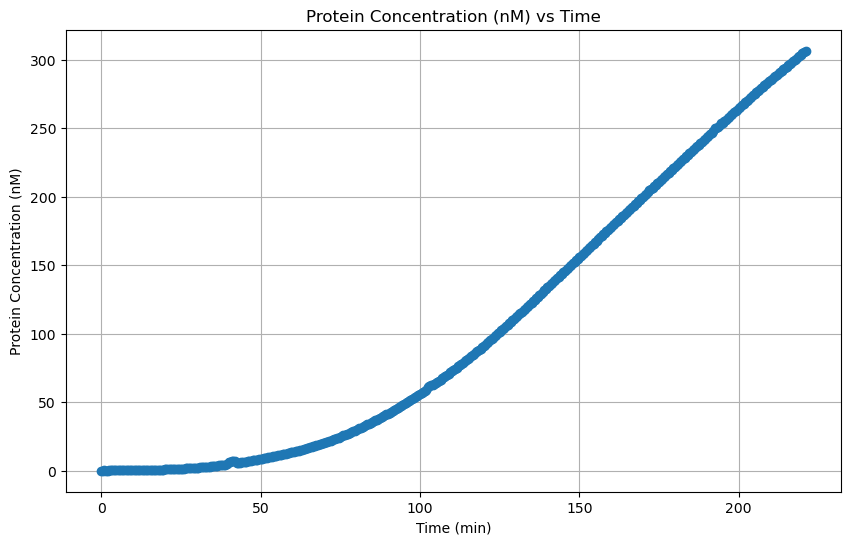

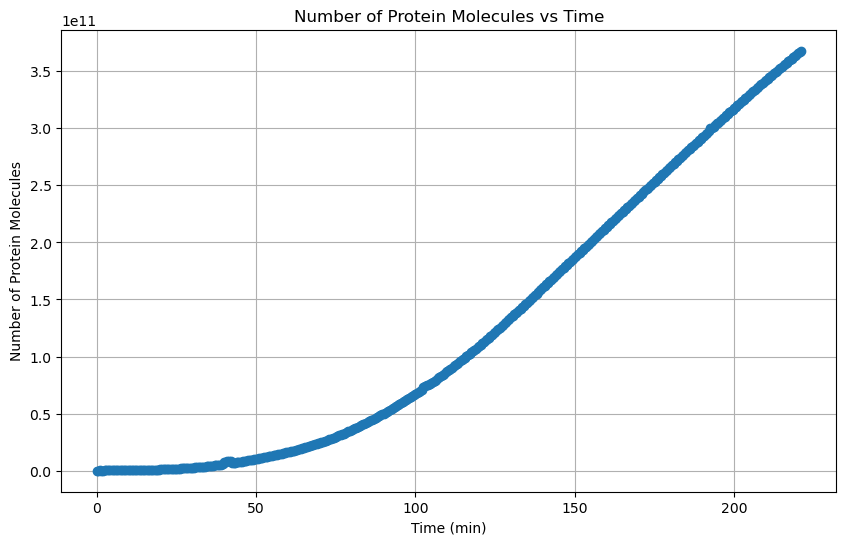

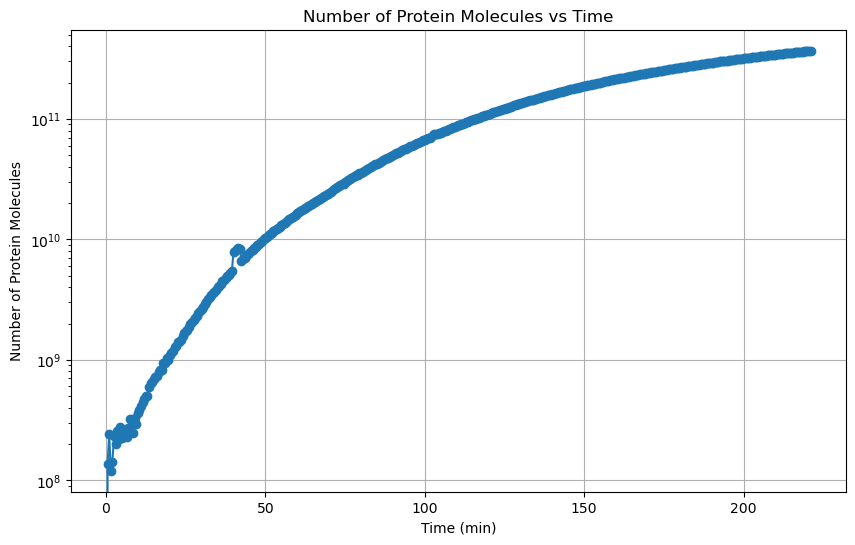

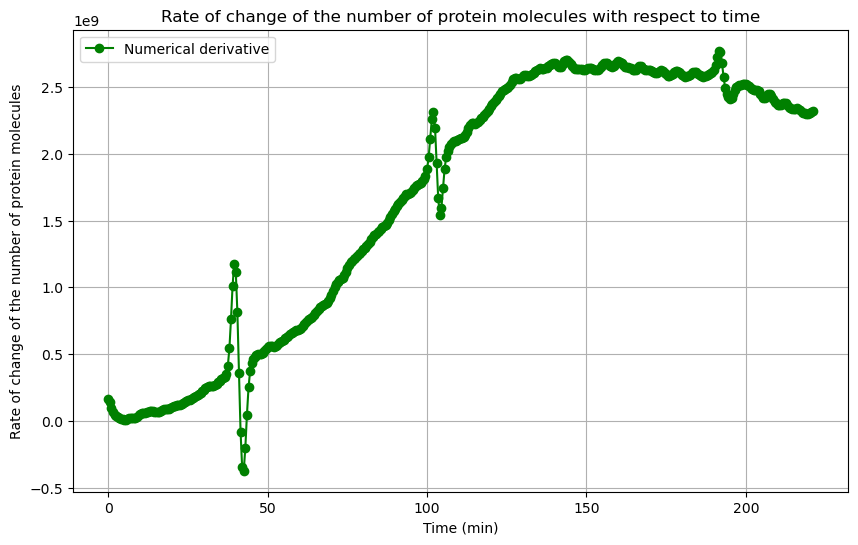

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.159710602699661
k_TX: 1.922035098380654
R_p: 31.085389417788093
tau_m: 733.8366248532163
K_TL: 4.675318939955801
R: 80.91366930025833
k_deg: 0.13769119726961776
X_p: 1.16070533912756
K_p: 1e-06
tau_0: 0.018825598425464385
tau_f: 325.1285606454355

This is the model whose optimized parameters were found using the provided initial guesses:


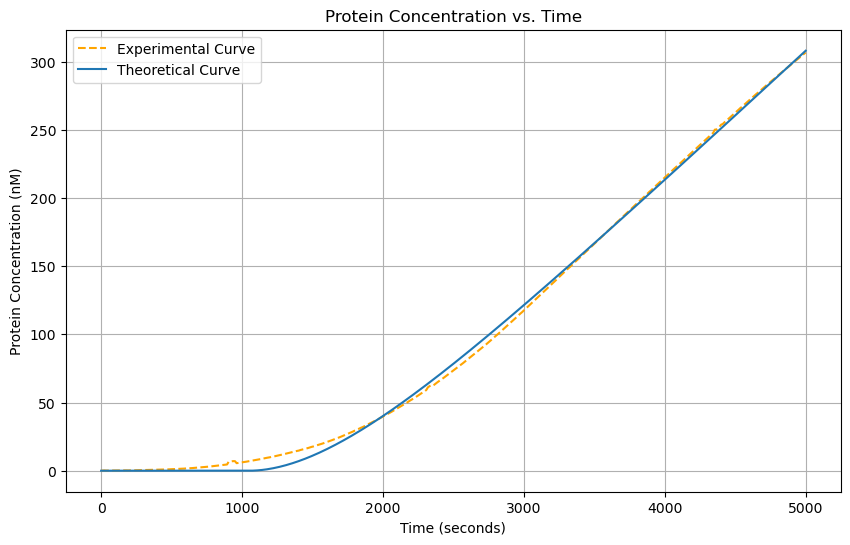

interactive(children=(FloatSlider(value=10.159710602699661, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=13.080485477343586, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.577412769846866, description='k_TL (amino acids/s)', layout=Layout(w…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.341254093069267, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=13.772616313181608, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=13.841059963054398, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 13.841059963054398
k_TX: 1.6693205245773228
R_p: 31.260082898533422
tau_m: 753.5021790732617
K_TL: 3.6985057248526374
R: 83.80625623563725
k_deg: 0.1710038627415429
X_p: 1.2811567229348952
K_p: 0.5847797949700109
tau_0: 0.0513123207631105
tau_f: 355.1585664936157

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.332468572840838, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 13.841059963054398
k_TX: 1.6693205245773228
R_p: 31.260082898533422
tau_m: 753.5021790732617
K_TL: 3.6985057248526374
R: 83.80625623563725
k_deg: 0.1710038627415429
X_p: 1.2811567229348952
K_p: 0.5847797949700109
tau_0: 0.0513123207631105
tau_f: 355.1585664936157


In [2]:
paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/kif3-activedrops/img_*********_gfp-4x_000.tif"))
calibration_curve_paths = sorted(glob.glob("/Users/edgarlarios/Dropbox/SURF_activedrops/Edgar/calibration_curve/***ugml.tif"))

# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# wrapper function to run the full analysis
# Time interval should be given in minutes, volume of the droplet should be given in microliters, molecular weight should be given in kDa
mp.runFullAnalysis(paths, calibration_curve_paths, 0.5, 2, 97.7, N_p, N_m, D, initial_guesses, "experimentalData_kif3.csv", "optimizedParameters_kif3.csv")
 

Chimera A 



The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.82701408625168
k_TX: 0.8805385777706434
R_p: 29.728038406731486
tau_m: 719.582337696686
K_TL: 5.0714748856920195
R: 79.76645663610014
k_deg: 0.1878540459508713
X_p: 0.9999525197189314
K_p: 5.363246410227035
tau_0: 0.0
tau_f: 295.84233754589343

This is the model whose optimized parameters were found using the provided initial guesses:


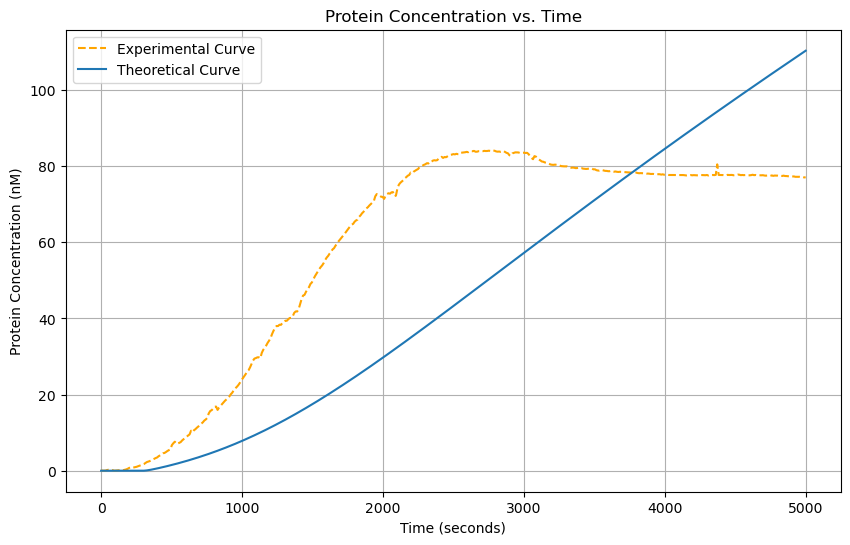

interactive(children=(FloatSlider(value=9.82701408625168, description='k_TL (amino acids/s)', layout=Layout(wi…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=13.179395905471807, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.06400369668193, description='k_TL (amino acids/s)', layout=Layout(wi…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=14.632783289848447, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=12.69685284365827, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=14.632783289848447, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 14.632783289848447
k_TX: 1.6681473751222953
R_p: 47.39975963159279
tau_m: 540.8806732181122
K_TL: 0.7047123565717612
R: 105.58495580222176
k_deg: 0.4853319127269344
X_p: 2.4168269744143345
K_p: 51.61553846644742
tau_0: 6.909335236660041e-05
tau_f: 308.8227091997294

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.516994499830226, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 14.632783289848447
k_TX: 1.6681473751222953
R_p: 47.39975963159279
tau_m: 540.8806732181122
K_TL: 0.7047123565717612
R: 105.58495580222176
k_deg: 0.4853319127269344
X_p: 2.4168269744143345
K_p: 51.61553846644742
tau_0: 6.909335236660041e-05
tau_f: 308.8227091997294


In [3]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_A.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_A.csv")

Chimera B



The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.001098043780196
k_TX: 0.935897732650389
R_p: 30.01196065113629
tau_m: 716.2359909580157
K_TL: 4.947502901171809
R: 80.99448509773913
k_deg: 0.2444631768490666
X_p: 0.9848857950157424
K_p: 5.176568844309173
tau_0: 6.822946571283239e-06
tau_f: 244.50292249598704

This is the model whose optimized parameters were found using the provided initial guesses:


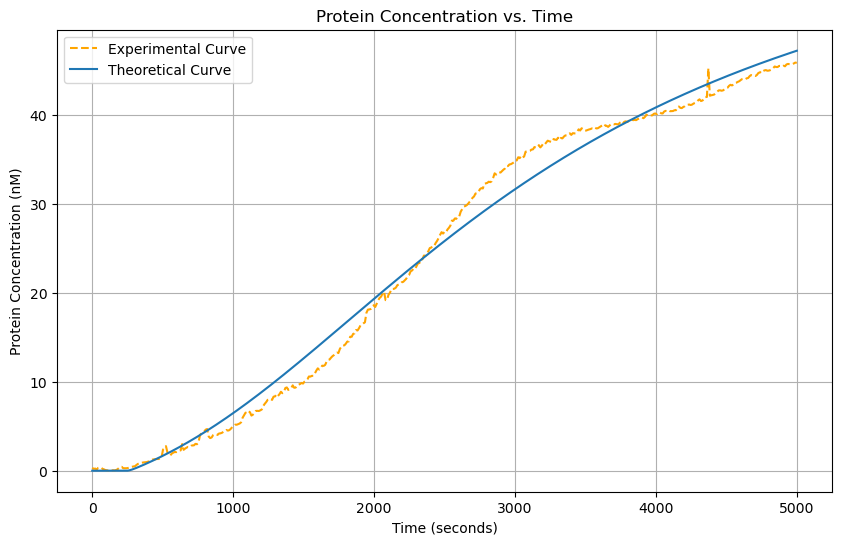

interactive(children=(FloatSlider(value=10.001098043780196, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.320363431508703, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.456198581140136, description='k_TL (amino acids/s)', layout=Layout(w…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.527829367252124, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.635220305845124, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.537446679523256, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.537446679523256
k_TX: 1.4056615585989505
R_p: 31.586648802535677
tau_m: 728.647228298257
K_TL: 4.9731615304216135
R: 98.5481921034014
k_deg: 0.3120141667742047
X_p: 1.3401121601969237
K_p: 5.4201655750962345
tau_0: 3.035925609573553e-06
tau_f: 312.7089801268346

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=4.471074242871595, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.537446679523256
k_TX: 1.4056615585989505
R_p: 31.586648802535677
tau_m: 728.647228298257
K_TL: 4.9731615304216135
R: 98.5481921034014
k_deg: 0.3120141667742047
X_p: 1.3401121601969237
K_p: 5.4201655750962345
tau_0: 3.035925609573553e-06
tau_f: 312.7089801268346


In [4]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_B.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_B.csv")

Chimera C

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.971934230988126
k_TX: 0.7629284874834354
R_p: 29.995677615202055
tau_m: 719.9997840938524
K_TL: 5.002008203174171
R: 79.99986105695308
k_deg: 0.6994373117392314
X_p: 2.092342185577337
K_p: 3.999887472912924
tau_0: 2.1513457681976433e-11
tau_f: 300.00008984260444

This is the model whose optimized parameters were found using the provided initial guesses:


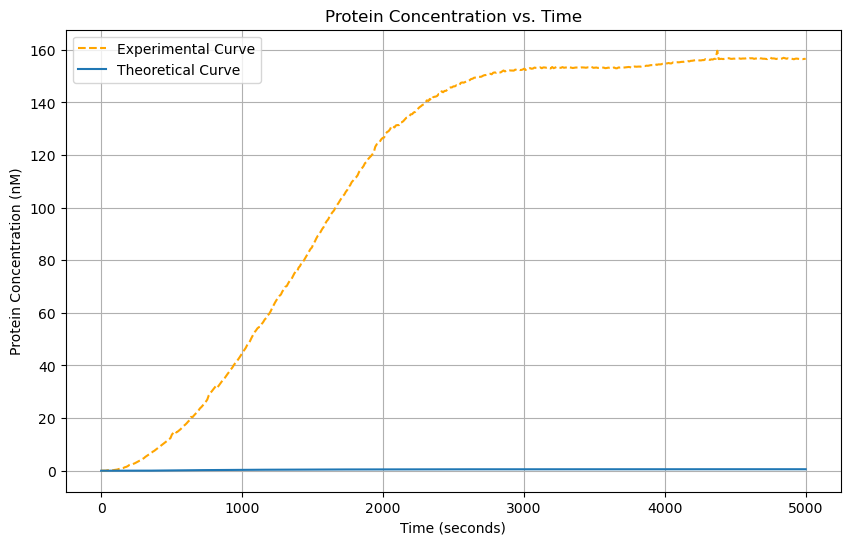

interactive(children=(FloatSlider(value=9.971934230988126, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.035977677720943, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.53021317350585, description='k_TL (amino acids/s)', layout=Layout(wi…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.58982885324972, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.92143878178932, description='k_TL (amino acids/s)', layout=Layout(wi…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=18.133906120569986, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 18.133906120569986
k_TX: 1.9578949378792885
R_p: 42.35263710624207
tau_m: 655.3835844783869
K_TL: 7.568855912454637
R: 79.03978143579491
k_deg: 0.6160625375250035
X_p: 2.410047684000631
K_p: 73.65978438080418
tau_0: 0.0
tau_f: 275.78950399633254

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.035977677720943, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 18.133906120569986
k_TX: 1.9578949378792885
R_p: 42.35263710624207
tau_m: 655.3835844783869
K_TL: 7.568855912454637
R: 79.03978143579491
k_deg: 0.6160625375250035
X_p: 2.410047684000631
K_p: 73.65978438080418
tau_0: 0.0
tau_f: 275.78950399633254


In [6]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_C.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_C.csv")

Chimera D

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.031469357760876
k_TX: 1.204896264186921
R_p: 30.25969706440881
tau_m: 677.6167816514503
K_TL: 4.929454408637206
R: 81.86972016424397
k_deg: 0.271898727509587
X_p: 1.095802444132289
K_p: 6.316446154767036
tau_0: 0.0
tau_f: 210.20621453857257

This is the model whose optimized parameters were found using the provided initial guesses:


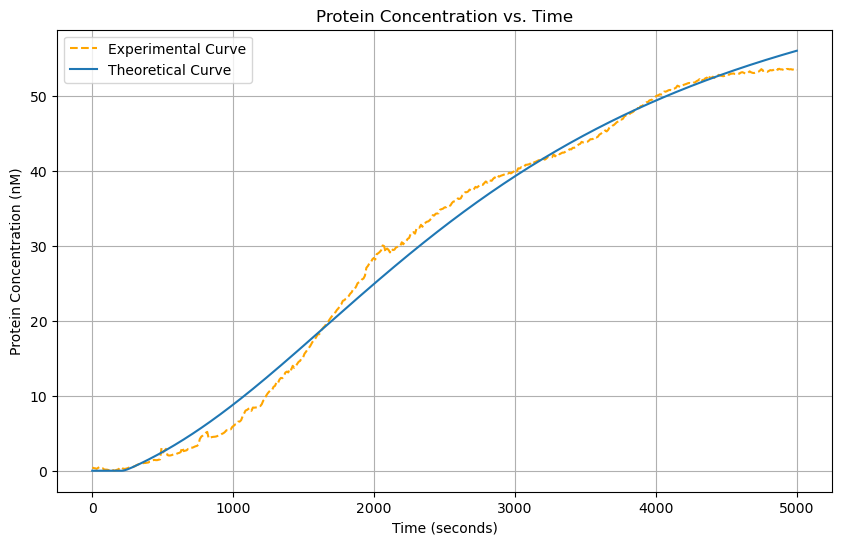

interactive(children=(FloatSlider(value=10.031469357760876, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.433032299206332, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.238543375828797, description='k_TL (amino acids/s)', layout=Layout(w…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.533413459505844, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.188208342725659, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.533413459505844, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.533413459505844
k_TX: 1.4252962244579592
R_p: 34.767851502904506
tau_m: 768.7075754205596
K_TL: 4.95278137472436
R: 68.66517630447441
k_deg: 0.3432689814242309
X_p: 1.4826353956073888
K_p: 9.692693038362975
tau_0: 0.0070558143454038
tau_f: 323.36268721006013

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=8.238543375828797, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.533413459505844
k_TX: 1.4252962244579592
R_p: 34.767851502904506
tau_m: 768.7075754205596
K_TL: 4.95278137472436
R: 68.66517630447441
k_deg: 0.3432689814242309
X_p: 1.4826353956073888
K_p: 9.692693038362975
tau_0: 0.0070558143454038
tau_f: 323.36268721006013


In [7]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 401  # Number of amino acids
N_m = 2097  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_D.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_D.csv")

Chimera E

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.807366237698474
k_TX: 1.2353446525703191
R_p: 29.48568442640675
tau_m: 709.716027772334
K_TL: 6.902209905700246
R: 119.49284325766297
k_deg: 0.07651526727295277
X_p: 1.0588207161513878
K_p: 20.28357255153601
tau_0: 0.0
tau_f: 255.32730803600725

This is the model whose optimized parameters were found using the provided initial guesses:


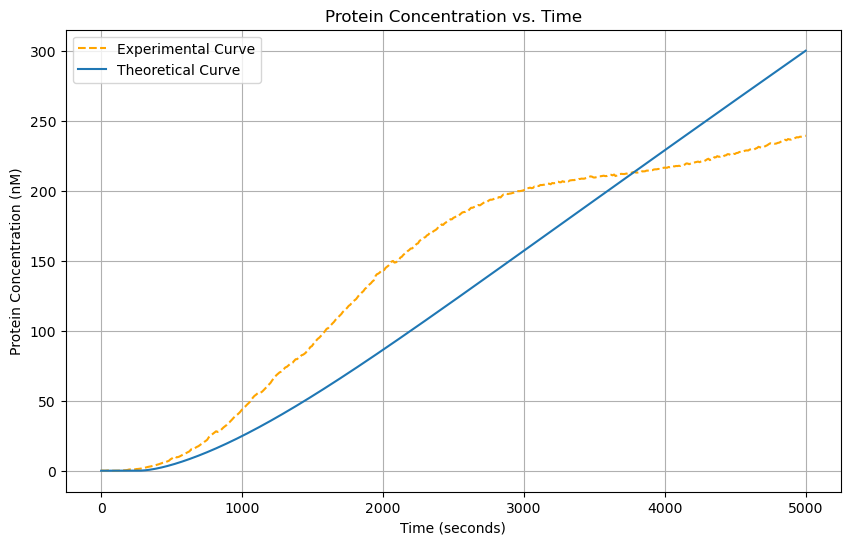

interactive(children=(FloatSlider(value=9.807366237698474, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.475588382586878, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.437148776209888, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.01434565353452, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.003207656120495, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=11.437148776209888, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 11.437148776209888
k_TX: 0.7745859842400051
R_p: 31.747257042447956
tau_m: 370.80439804776734
K_TL: 0.0
R: 82.81090597937327
k_deg: 0.0
X_p: 1.1044342989387417
K_p: 4.688785800019943
tau_0: 0.0
tau_f: 47.656662342237496

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.12780107410358, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 11.437148776209888
k_TX: 0.7745859842400051
R_p: 31.747257042447956
tau_m: 370.80439804776734
K_TL: 0.0
R: 82.81090597937327
k_deg: 0.0
X_p: 1.1044342989387417
K_p: 4.688785800019943
tau_0: 0.0
tau_f: 47.656662342237496


In [8]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_E.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_E.csv")

Chimera F

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.097317543229515
k_TX: 0.9962958890551619
R_p: 29.517710106886597
tau_m: 680.3055419558054
K_TL: 7.384939394038206
R: 102.56195312824565
k_deg: 0.10135618159944215
X_p: 1.07707923732832
K_p: 30.535681668797263
tau_0: 0.0
tau_f: 310.42465846464063

This is the model whose optimized parameters were found using the provided initial guesses:


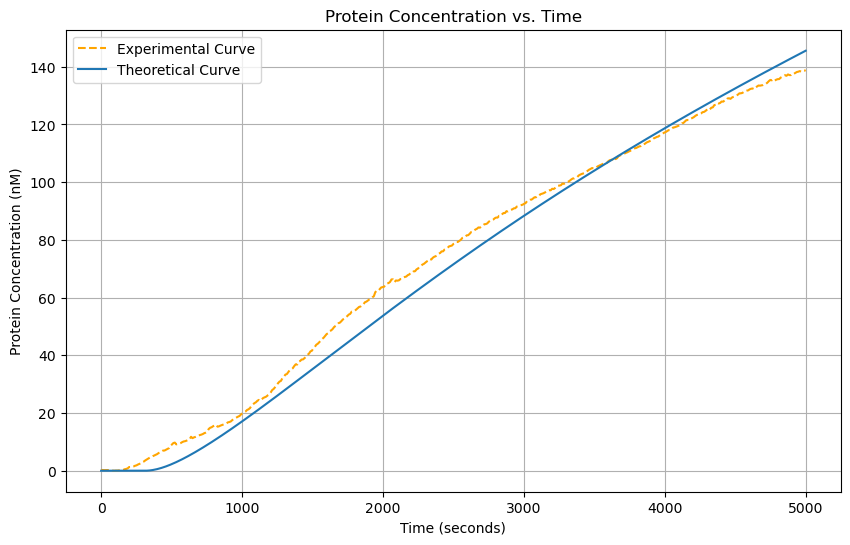

interactive(children=(FloatSlider(value=10.097317543229515, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.932398718014625, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.726856094369339, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.803294624931056, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.010736218736419, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=10.214120827557451, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 10.214120827557451
k_TX: 1.4907148882130985
R_p: 30.962144008930892
tau_m: 683.6115636120642
K_TL: 2.2909120205208993
R: 87.38458969309158
k_deg: 0.1658446084901612
X_p: 1.2845661154827894
K_p: 31.13666592766007
tau_0: 0.0
tau_f: 242.8308779695442

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.465274158041318, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 10.214120827557451
k_TX: 1.4907148882130985
R_p: 30.962144008930892
tau_m: 683.6115636120642
K_TL: 2.2909120205208993
R: 87.38458969309158
k_deg: 0.1658446084901612
X_p: 1.2845661154827894
K_p: 31.13666592766007
tau_0: 0.0
tau_f: 242.8308779695442


In [6]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_F.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_F.csv")

Chimera G

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.008352726654664
k_TX: 1.0692751976921286
R_p: 30.496685745286925
tau_m: 701.0515292012292
K_TL: 2.435142680176938
R: 108.24703026171767
k_deg: 0.1316892484995691
X_p: 1.3901767541160268
K_p: 21.595150072800312
tau_0: 4.695879241012335e-10
tau_f: 311.9803253757923

This is the model whose optimized parameters were found using the provided initial guesses:


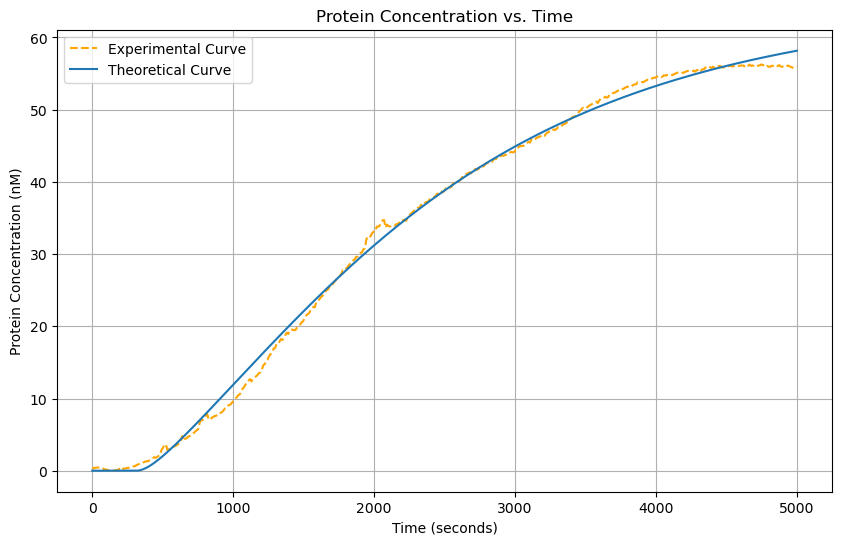

interactive(children=(FloatSlider(value=10.008352726654664, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.153951736303078, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.608629306450517, description='k_TL (amino acids/s)', layout=Layout(w…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.644005500141134, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=13.071337957232956, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=11.153951736303078, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 11.153951736303078
k_TX: 0.9943226284575886
R_p: 27.87267264772717
tau_m: 770.3208393789696
K_TL: 4.647658523565227
R: 69.53867855970162
k_deg: 0.144465986503981
X_p: 1.354539740897195
K_p: 27.103048249024013
tau_0: 0.5396359635811248
tau_f: 326.91401759775886

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.644005500141134, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 11.153951736303078
k_TX: 0.9943226284575886
R_p: 27.87267264772717
tau_m: 770.3208393789696
K_TL: 4.647658523565227
R: 69.53867855970162
k_deg: 0.144465986503981
X_p: 1.354539740897195
K_p: 27.103048249024013
tau_0: 0.5396359635811248
tau_f: 326.91401759775886


In [7]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_G.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_G.csv")

Chimera H

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 11.605956076324567
k_TX: 1.1656879553071349
R_p: 35.80036259097204
tau_m: 671.3377304190785
K_TL: 1.687239653542072
R: 99.78695750350141
k_deg: 0.22494646961794018
X_p: 1.364010216339608
K_p: 55.28011501346472
tau_0: 0.012997428718532156
tau_f: 299.6605673291233

This is the model whose optimized parameters were found using the provided initial guesses:


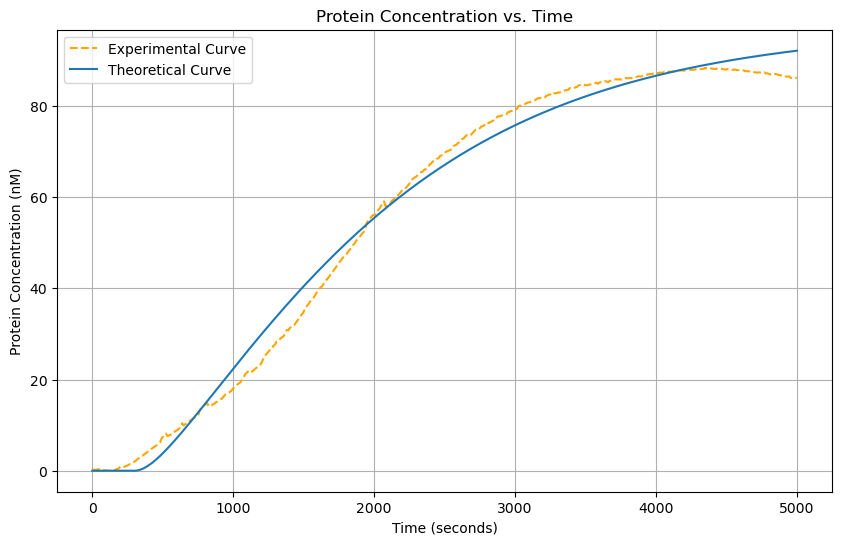

interactive(children=(FloatSlider(value=11.605956076324567, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=13.9160439449659, description='k_TL (amino acids/s)', layout=Layout(wi…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.61074971798876, description='k_TL (amino acids/s)', layout=Layout(wi…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.77513955055074, description='k_TL (amino acids/s)', layout=Layout(wi…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.985556276175814, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=12.154477770993964, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 12.154477770993964
k_TX: 1.9405117118227295
R_p: 28.924834334717644
tau_m: 640.4079723113873
K_TL: 4.573444573107707
R: 81.85108100564952
k_deg: 0.2593305074520273
X_p: 1.264155477596688
K_p: 30.87352262584238
tau_0: 2.7140776063028227e-05
tau_f: 224.75392689192904

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.77513955055074, description='k_TL (amino acids/s)', layout=Layout(wi…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 12.154477770993964
k_TX: 1.9405117118227295
R_p: 28.924834334717644
tau_m: 640.4079723113873
K_TL: 4.573444573107707
R: 81.85108100564952
k_deg: 0.2593305074520273
X_p: 1.264155477596688
K_p: 30.87352262584238
tau_0: 2.7140776063028227e-05
tau_f: 224.75392689192904


In [8]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_p = 592  # Number of amino acids
N_m = 2711  # Number of nucleotides
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_H.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_H.csv")

AcSu



The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 11.302143917137656
k_TX: 1.0208077711719596
R_p: 32.07502283417929
tau_m: 724.3326055031
K_TL: 4.894996497134208
R: 80.01911978323392
k_deg: 0.13079321589181347
X_p: 1.1209508343058872
K_p: 14.505318947194418
tau_0: 9.607583339210635e-05
tau_f: 300.89393809010255

This is the model whose optimized parameters were found using the provided initial guesses:


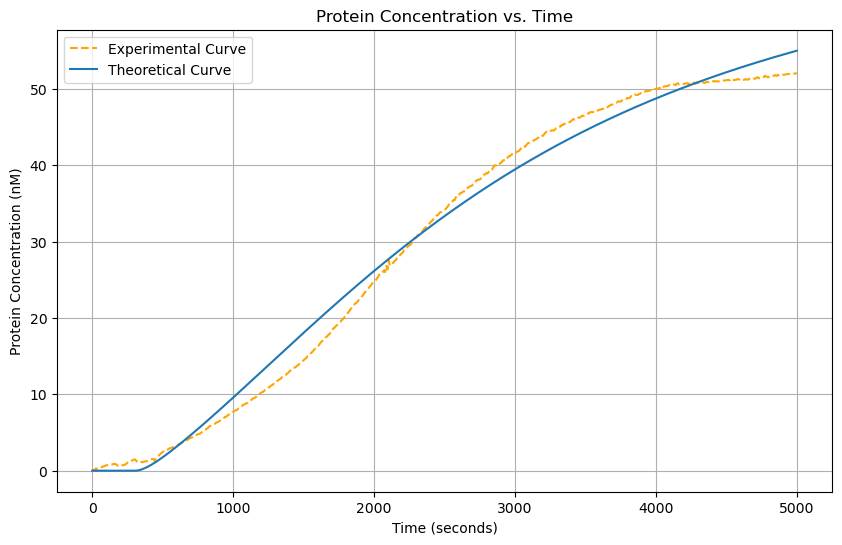

interactive(children=(FloatSlider(value=11.302143917137656, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.453232228232721, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.34295211992417, description='k_TL (amino acids/s)', layout=Layout(wi…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.23368216502977, description='k_TL (amino acids/s)', layout=Layout(wi…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.533141647344316, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=9.34295211992417, description='k_TL (amino acids/s)', layout=Layout(wi…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 9.34295211992417
k_TX: 1.0071675387915064
R_p: 27.183219094284254
tau_m: 732.4687120438184
K_TL: 5.106693254081499
R: 115.37150767722837
k_deg: 0.0907583221917036
X_p: 1.3094009005174885
K_p: 25.370964476704664
tau_0: 0.0931545269435218
tau_f: 410.5212091210443

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=11.59506149842229, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 9.34295211992417
k_TX: 1.0071675387915064
R_p: 27.183219094284254
tau_m: 732.4687120438184
K_TL: 5.106693254081499
R: 115.37150767722837
k_deg: 0.0907583221917036
X_p: 1.3094009005174885
K_p: 25.370964476704664
tau_0: 0.0931545269435218
tau_f: 410.5212091210443


In [4]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2481  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_AcSu.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_AcSu.csv")

AcSu2

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 14.781322203925725
k_TX: 1.7897679450260284
R_p: 50.151172056647795
tau_m: 596.8718866632958
K_TL: 4.4912238972793475
R: 158.3125034666163
k_deg: 0.290287180966466
X_p: 1.8474798788169835
K_p: 29.01008285476227
tau_0: 0.0026617817298379975
tau_f: 168.39934378040073

This is the model whose optimized parameters were found using the provided initial guesses:


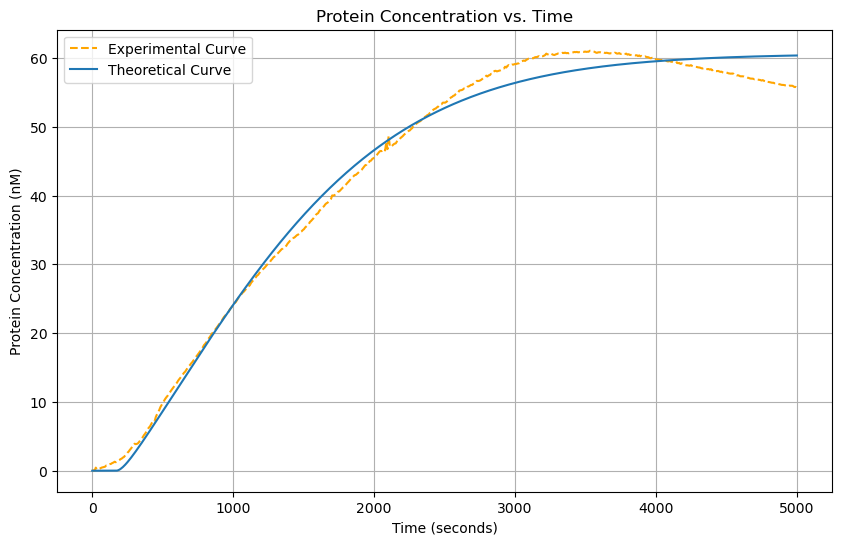

interactive(children=(FloatSlider(value=14.781322203925725, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.24007257941868, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=12.013111979176387, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=13.763982445568502, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.969661136066364, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=15.734508150968814, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 15.734508150968814
k_TX: 2.104175402114869
R_p: 37.21914485458532
tau_m: 504.5020326469212
K_TL: 4.824653407085137
R: 210.5190093792997
k_deg: 0.2633953098270609
X_p: 1.5109626381390058
K_p: 23.59460977598119
tau_0: 0.0129827074934683
tau_f: 171.66173825170847

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.189481279575276, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 15.734508150968814
k_TX: 2.104175402114869
R_p: 37.21914485458532
tau_m: 504.5020326469212
K_TL: 4.824653407085137
R: 210.5190093792997
k_deg: 0.2633953098270609
X_p: 1.5109626381390058
K_p: 23.59460977598119
tau_0: 0.0129827074934683
tau_f: 171.66173825170847


In [5]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2481  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_AcSu2.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_AcSu2.csv")

AdPa

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 23.240873915112576
k_TX: 6.056065174696158
R_p: 39.119254437649715
tau_m: 711.8158297447992
K_TL: 0.0
R: 56.590730853255025
k_deg: 1.1483117287613283
X_p: 3.8553474297994796
K_p: 100.0
tau_0: 0.0
tau_f: 296.0895706795344

This is the model whose optimized parameters were found using the provided initial guesses:


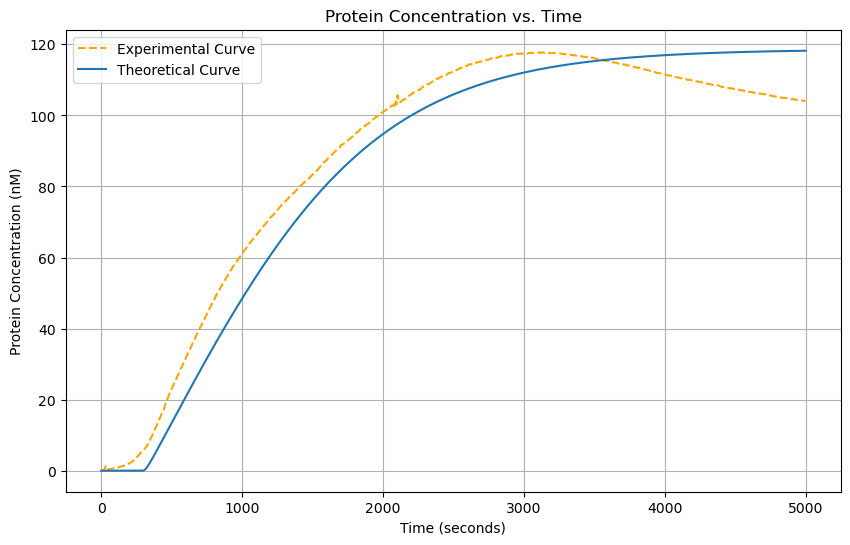

interactive(children=(FloatSlider(value=23.240873915112576, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=13.431037610145559, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=15.382261244835703, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.305610236382542, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.180965210898378, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=15.382261244835703, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 15.382261244835703
k_TX: 1.894733148826667
R_p: 25.121271311998413
tau_m: 646.468405281094
K_TL: 4.08731622614642
R: 84.22729464402028
k_deg: 0.2480593217970721
X_p: 1.3690712177537137
K_p: 26.267601009549058
tau_0: 0.0
tau_f: 0.0051208346272915

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.180965210898378, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 15.382261244835703
k_TX: 1.894733148826667
R_p: 25.121271311998413
tau_m: 646.468405281094
K_TL: 4.08731622614642
R: 84.22729464402028
k_deg: 0.2480593217970721
X_p: 1.3690712177537137
K_p: 26.267601009549058
tau_0: 0.0
tau_f: 0.0051208346272915


In [3]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2115  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_AdPa.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_AdPa.csv")

BleSto

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.913777655342273
k_TX: 0.49885378943294256
R_p: 29.880404625813412
tau_m: 716.9804033579435
K_TL: 4.985082329312327
R: 79.81278538162059
k_deg: 0.01106229466540043
X_p: 1.0866860796693345
K_p: 5.2558342607536375
tau_0: 0.0
tau_f: 299.17192196662506

This is the model whose optimized parameters were found using the provided initial guesses:


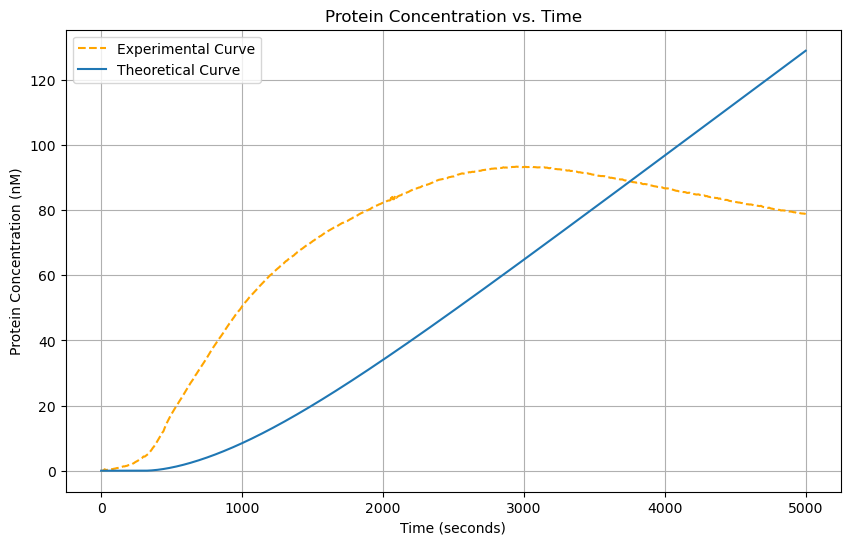

interactive(children=(FloatSlider(value=9.913777655342273, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=12.389562188360202, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.075206879844629, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.657621782927322, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.303799360343831, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=18.45117003000203, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 18.45117003000203
k_TX: 1.9786249127583488
R_p: 60.53562821213714
tau_m: 334.144492359027
K_TL: 0.0
R: 91.17471354756157
k_deg: 0.3099516547819263
X_p: 1.5032193303037786
K_p: 45.142717152957346
tau_0: 0.0
tau_f: 1.9868942577136297

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=11.310363561883385, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 18.45117003000203
k_TX: 1.9786249127583488
R_p: 60.53562821213714
tau_m: 334.144492359027
K_TL: 0.0
R: 91.17471354756157
k_deg: 0.3099516547819263
X_p: 1.5032193303037786
K_p: 45.142717152957346
tau_0: 0.0
tau_f: 1.9868942577136297


In [15]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2604  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_BleSto.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_BleSto.csv")

DiPu

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 10.181444239757084
k_TX: 1.1771504003251536
R_p: 30.528477823511565
tau_m: 696.1326654591933
K_TL: 3.8026370154829436
R: 84.53458017086479
k_deg: 0.124454379964682
X_p: 1.1333397160740617
K_p: 18.024914645389682
tau_0: 3.838817796975036e-08
tau_f: 46.77080350831466

This is the model whose optimized parameters were found using the provided initial guesses:


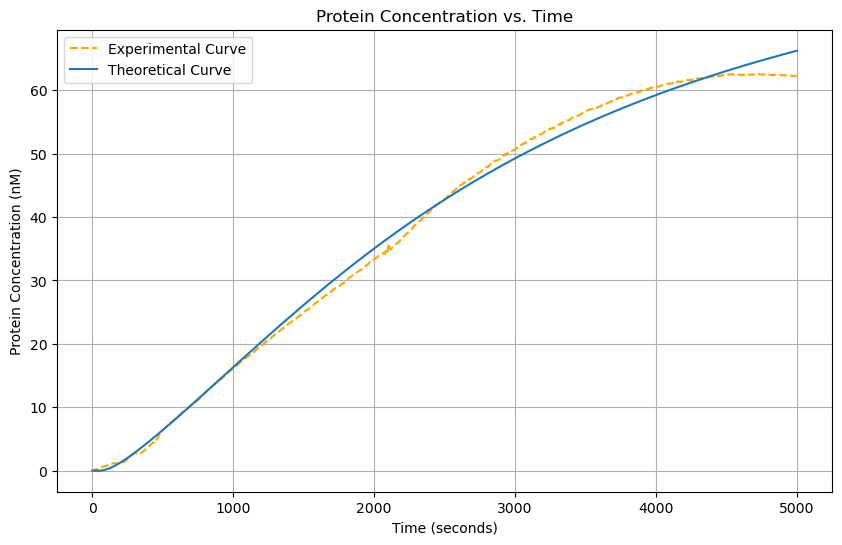

interactive(children=(FloatSlider(value=10.181444239757084, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=12.619763192979136, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=12.341743388706902, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.203147389670704, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.214447737174595, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=11.940359862576967, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 11.940359862576967
k_TX: 1.4537708420258113
R_p: 35.87760633429224
tau_m: 827.3235497363075
K_TL: 3.1908819363086423
R: 76.81060095079135
k_deg: 0.2257924968988547
X_p: 1.386924164684558
K_p: 22.74653684239122
tau_0: 0.0
tau_f: 221.62347026828297

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.214447737174597, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 11.940359862576967
k_TX: 1.4537708420258113
R_p: 35.87760633429224
tau_m: 827.3235497363075
K_TL: 3.1908819363086423
R: 76.81060095079135
k_deg: 0.2257924968988547
X_p: 1.386924164684558
K_p: 22.74653684239122
tau_0: 0.0
tau_f: 221.62347026828297


In [16]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2481  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_DiPu.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_DiPu.csv")

HeAl

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.819506941044004
k_TX: 0.5299461164213284
R_p: 29.976667404213828
tau_m: 719.5379896040308
K_TL: 5.0091225992402855
R: 79.99992134452259
k_deg: 0.00850841233427957
X_p: 4.450470388780701
K_p: 4.01254344425859
tau_0: 0.0
tau_f: 299.92186820883194

This is the model whose optimized parameters were found using the provided initial guesses:


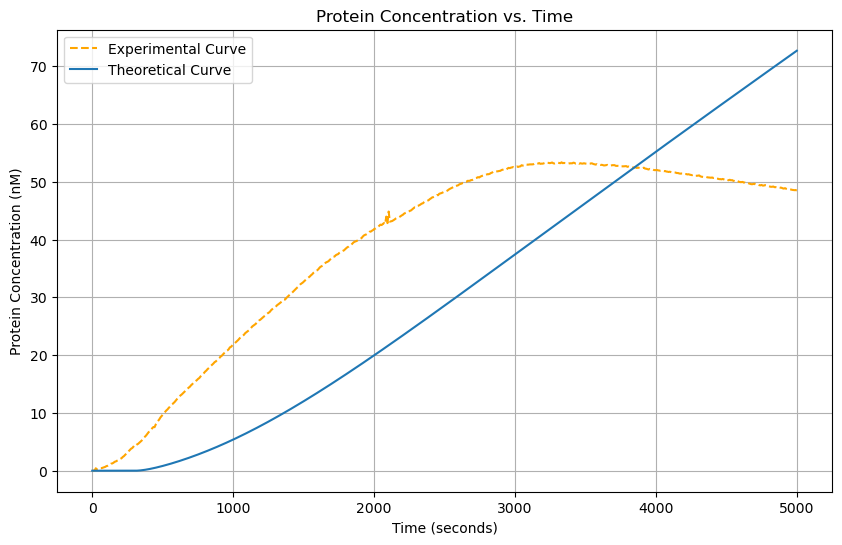

interactive(children=(FloatSlider(value=9.819506941044004, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=11.199623783452331, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=17.65653323364338, description='k_TL (amino acids/s)', layout=Layout(w…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.80504409420702, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.996953743700935, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=12.941232836448322, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 12.941232836448322
k_TX: 1.4068820206673678
R_p: 37.524433530099856
tau_m: 497.64428153614904
K_TL: 3.658304126717397
R: 77.97177207645512
k_deg: 0.2041497341994613
X_p: 1.390776861371961
K_p: 40.158904897925666
tau_0: 0.0
tau_f: 180.99001274528075

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.068969393942666, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 12.941232836448322
k_TX: 1.4068820206673678
R_p: 37.524433530099856
tau_m: 497.64428153614904
K_TL: 3.658304126717397
R: 77.97177207645512
k_deg: 0.2041497341994613
X_p: 1.390776861371961
K_p: 40.158904897925666
tau_0: 0.0
tau_f: 180.99001274528075


In [17]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2430  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_HeAl.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_HeAl.csv")

NaGr

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 11.298246063237563
k_TX: 1.882846088118562
R_p: 34.074669116791654
tau_m: 533.0893211778966
K_TL: 3.095129624745404
R: 86.89803026017353
k_deg: 0.22624587329620738
X_p: 1.407319741464022
K_p: 30.447937611115442
tau_0: 0.000403238515432669
tau_f: 14.232878134928228

This is the model whose optimized parameters were found using the provided initial guesses:


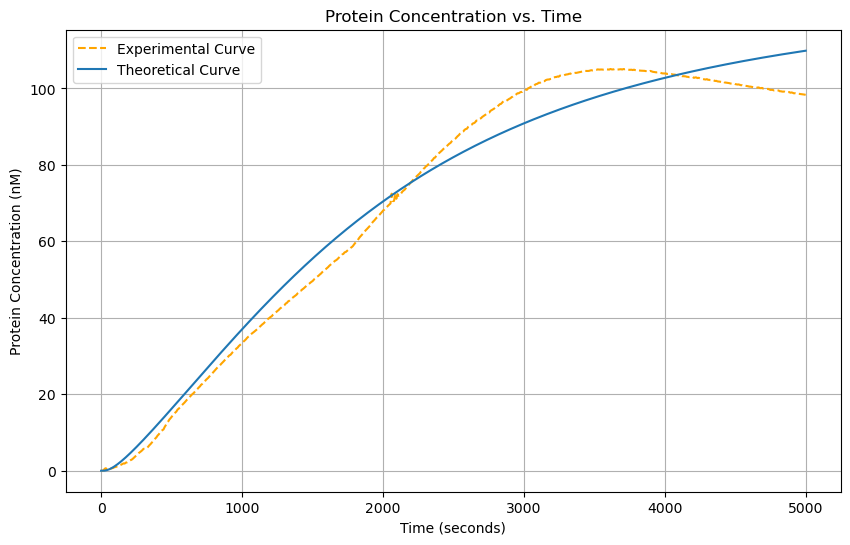

interactive(children=(FloatSlider(value=11.298246063237563, description='k_TL (amino acids/s)', layout=Layout(…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.954528963561081, description='k_TL (amino acids/s)', layout=Layout(…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.512266646139182, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=24.638227940129436, description='k_TL (amino acids/s)', layout=Layout(…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=19.140524431634038, description='k_TL (amino acids/s)', layout=Layout(…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=24.638227940129436, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 24.638227940129436
k_TX: 0.8072804780294547
R_p: 30.87652451958914
tau_m: 654.8563410932907
K_TL: 5.700314142672745
R: 99.68031788503436
k_deg: 0.2687006510788094
X_p: 1.3805357223177168
K_p: 46.33110402083572
tau_0: 9.079877834405892e-05
tau_f: 5.193452437343808

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=9.361878928828771, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 24.638227940129436
k_TX: 0.8072804780294547
R_p: 30.87652451958914
tau_m: 654.8563410932907
K_TL: 5.700314142672745
R: 99.68031788503436
k_deg: 0.2687006510788094
X_p: 1.3805357223177168
K_p: 46.33110402083572
tau_0: 9.079877834405892e-05
tau_f: 5.193452437343808


In [18]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2067  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_NaGr.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_NaGr.csv")

TiLa

The theoretical model that best fits the experimental data has the following parameters. These optimized parameters were calculated using the provided initial guesses:

k_TL: 9.620165666577478
k_TX: 1.3096579990058714
R_p: 59.53632274972992
tau_m: 288.23210349029387
K_TL: 5.977421724501838
R: 94.42642417474582
k_deg: 0.0
X_p: 1.0121898518379453
K_p: 4.00036991031903
tau_0: 0.0
tau_f: 440.1921100103766

This is the model whose optimized parameters were found using the provided initial guesses:


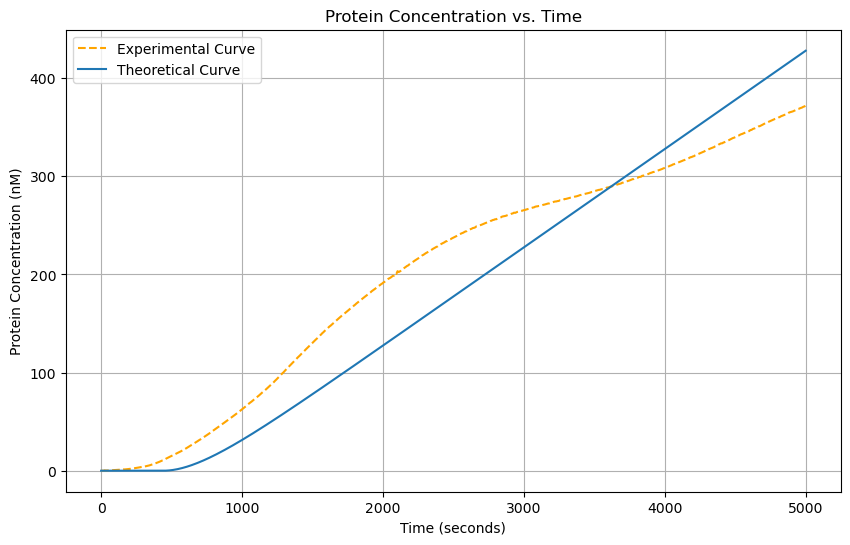

interactive(children=(FloatSlider(value=9.620165666577478, description='k_TL (amino acids/s)', layout=Layout(w…

RANDOM initial guesses will now be used to calculate the parameters that make the theoretical model best fit the experimental data.

1  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=8.692012638138472, description='k_TL (amino acids/s)', layout=Layout(w…

2  sets of optimized parameters have been found so far
3  sets of optimized parameters have been found so far
4  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=10.545096711328753, description='k_TL (amino acids/s)', layout=Layout(…

5  sets of optimized parameters have been found so far
6  sets of optimized parameters have been found so far
7  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.978322907119576, description='k_TL (amino acids/s)', layout=Layout(w…

8  sets of optimized parameters have been found so far
9  sets of optimized parameters have been found so far
10  sets of optimized parameters have been found so far
This is an example of a model that has optimal parameters. These optimal parameters were found using RANDOM initial guesses:


interactive(children=(FloatSlider(value=9.942252435439158, description='k_TL (amino acids/s)', layout=Layout(w…


This model was calculated using RANDOM initial guesses and has the least value of SSE (this is the BEST found model):


interactive(children=(FloatSlider(value=11.092471512924496, description='k_TL (amino acids/s)', layout=Layout(…

The values of the optimized parameters of the BEST found model were as follows:

k_TL: 11.092471512924496
k_TX: 1.6624224023568246
R_p: 24.652425408176413
tau_m: 468.2155522638154
K_TL: 5.246645847003492
R: 92.2218059614118
k_deg: 0.0001243934183747
X_p: 1.0928375759796438
K_p: 3.3273266294868833
tau_0: 2.525064077829598e-07
tau_f: 226.82942060501705

This model was calculated using RANDOM initial guesses and has the greatest value of SSE (this is the WORST found model):


interactive(children=(FloatSlider(value=10.45909775517422, description='k_TL (amino acids/s)', layout=Layout(w…

The values of the optimized parameters of the WORST found model were as follows:

k_TL: 11.092471512924496
k_TX: 1.6624224023568246
R_p: 24.652425408176413
tau_m: 468.2155522638154
K_TL: 5.246645847003492
R: 92.2218059614118
k_deg: 0.0001243934183747
X_p: 1.0928375759796438
K_p: 3.3273266294868833
tau_0: 2.525064077829598e-07
tau_f: 226.82942060501705


In [3]:
# Provide your specific values for N_p, N_m, D, and initial guesses
N_m = 2430  # Number of nucleotides
N_p = N_m/3  # Number of amino acids
D = 100  # DNA concentration

# Initial guesses for the optimization parameters
k_TL = 10      # Translation rate constant (1/s)
k_TX = 1       # Transcription rate constant (1/s)
R_p = 30       # RNA polymerase concentration (nM)
tau_m = 720    # Mean lifetime of mRNA (s)
K_TL = 5       # Translation efficiency constant (unitless)
R = 80        # Ribosome concentration (nM)
k_deg = 0.01   # Degradation rate constant (1/s)
X_p = 1        # Protein concentration (nM)
K_p = 4        # Protein degradation constant (nM)
tau_0 = 0    # Transcription delay (s)
tau_f = 300    # Protein Folding delay (s)

initial_guesses = [k_TL, k_TX, R_p, tau_m, K_TL, R, k_deg, X_p, K_p, tau_0, tau_f] # ***In the future, ask for inputs to the user

mp.reset()
# Wrapper function to run the theoretical analysis ONLY
mp.runTheoreticalAnalysis("experimentalData_TiLa.csv", N_p, N_m, D, initial_guesses, "optimizedParameters_TiLa.csv")

1.- make sure the constrained optimization works for k401 and kif3 with the specified first guesses

2.- the code should generate protein concentration vs time plots for k401 and kif3 (overlapped -- all). Make sure time is in the same units in all plots (minutes)

3.- generate the experimental plot overlapped with the theoretical for each individual protein (k401 and kif3)

4.- everything should run upon the wrapper function

5.- generate the plot with sliders for each individual protein. Set inferred parameters as slider preset value.

6.- create a scatter plot where the x axis is the different parameters names, the y axis is the value, and the color is the protein name.

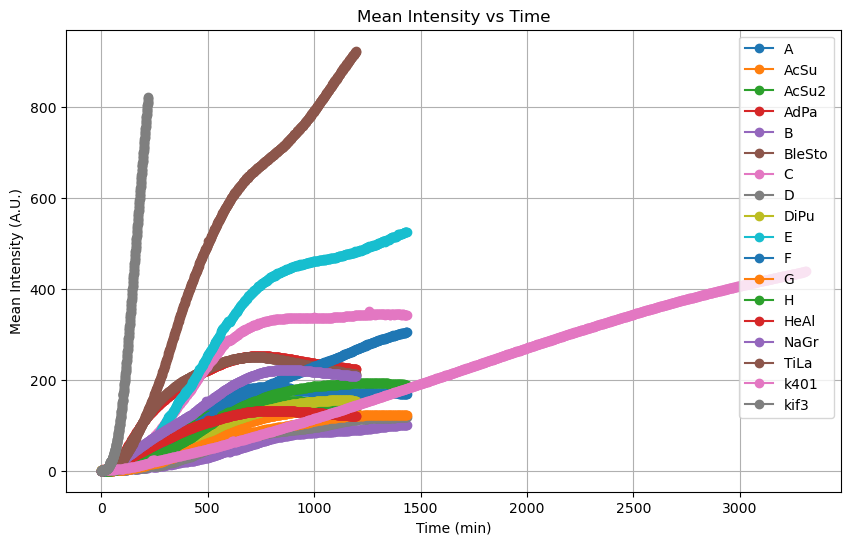

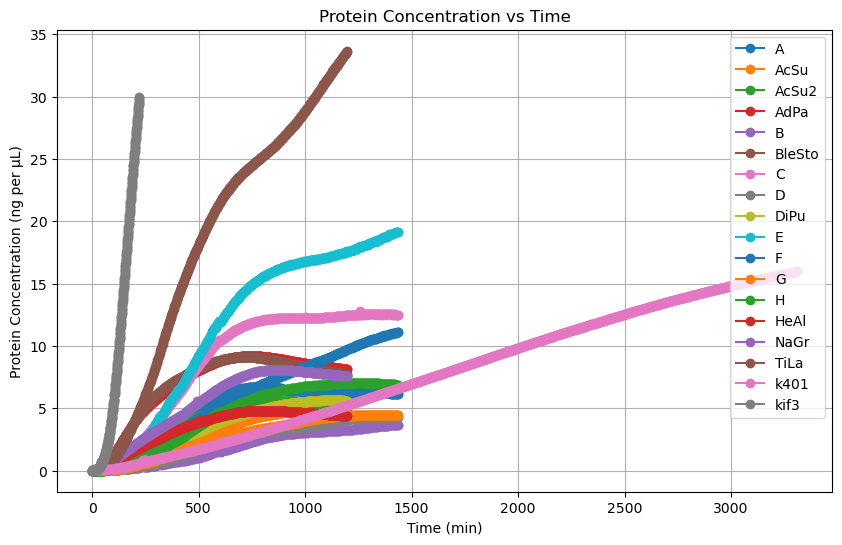

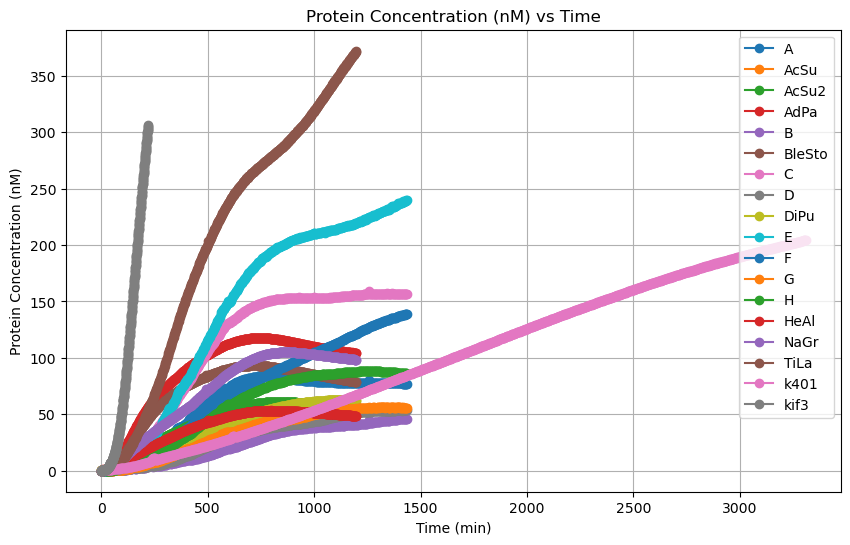

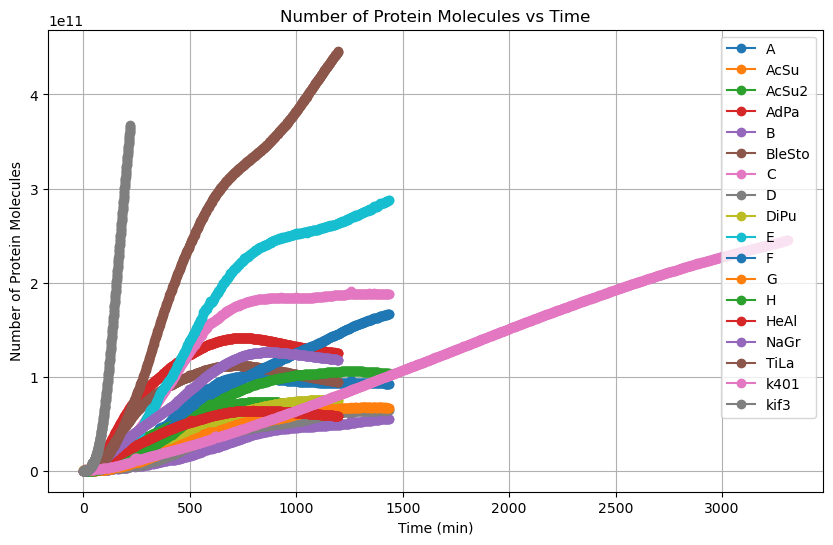

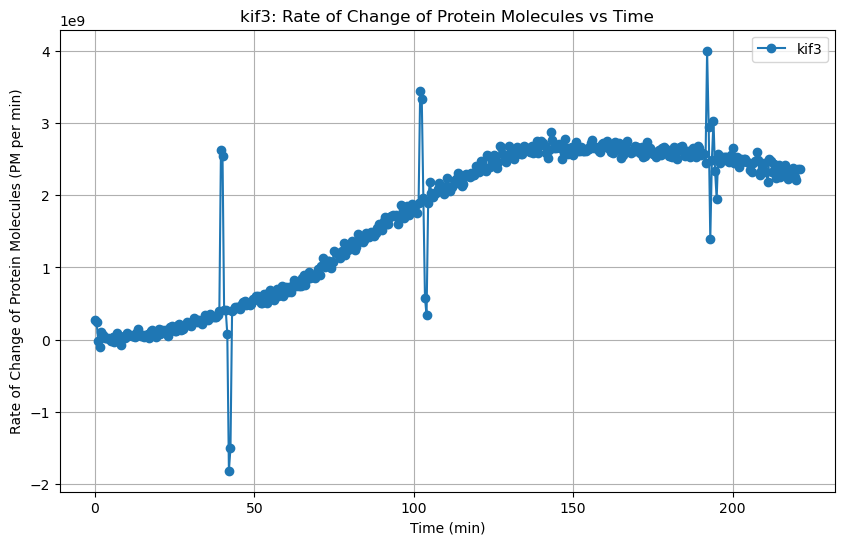

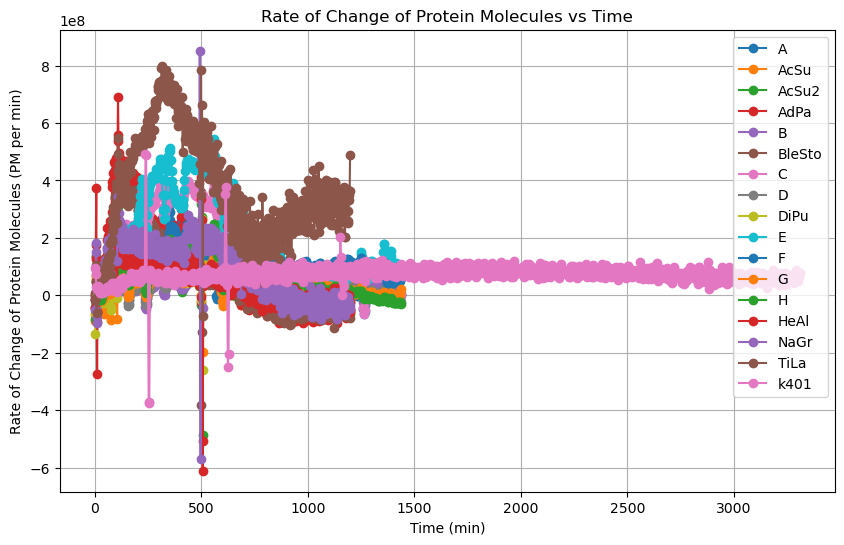

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


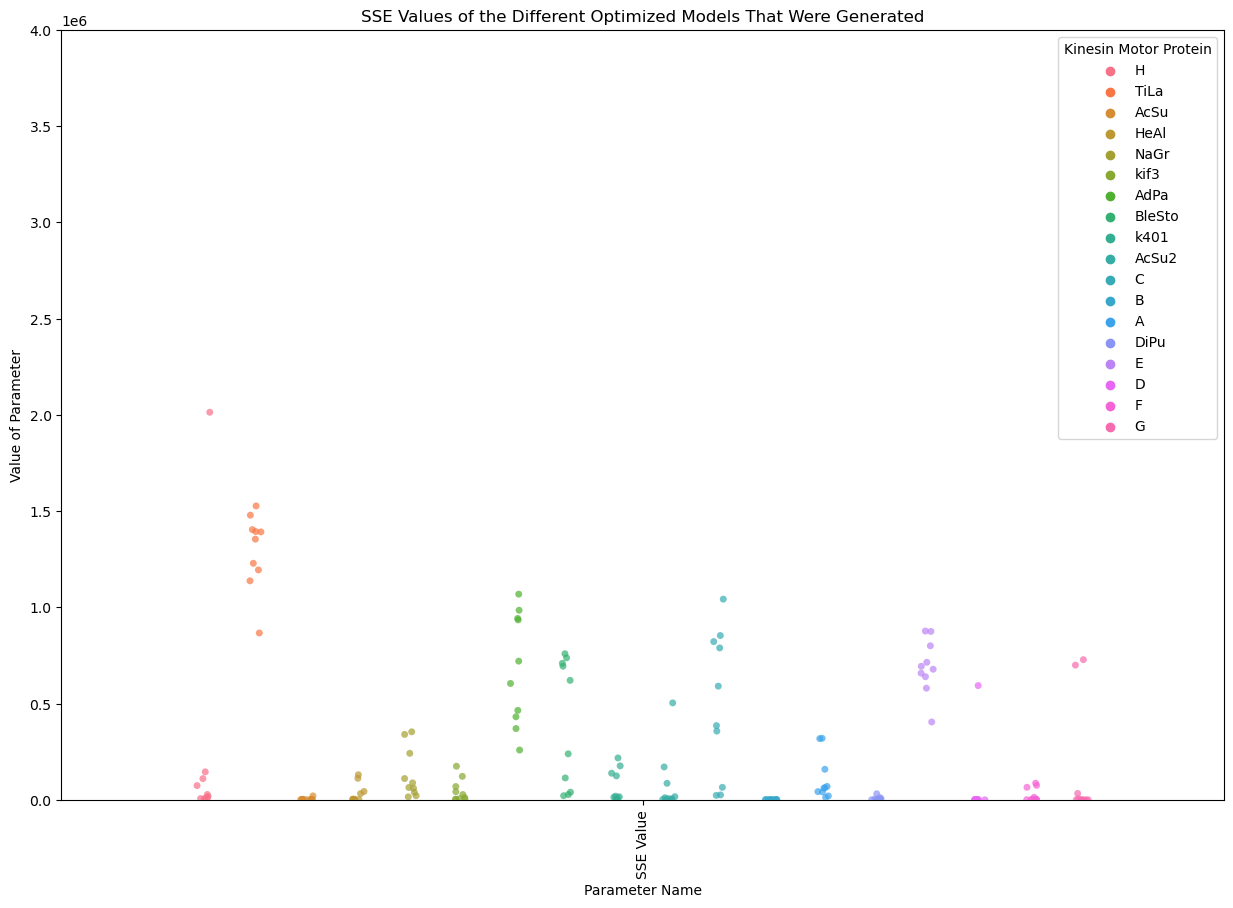

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


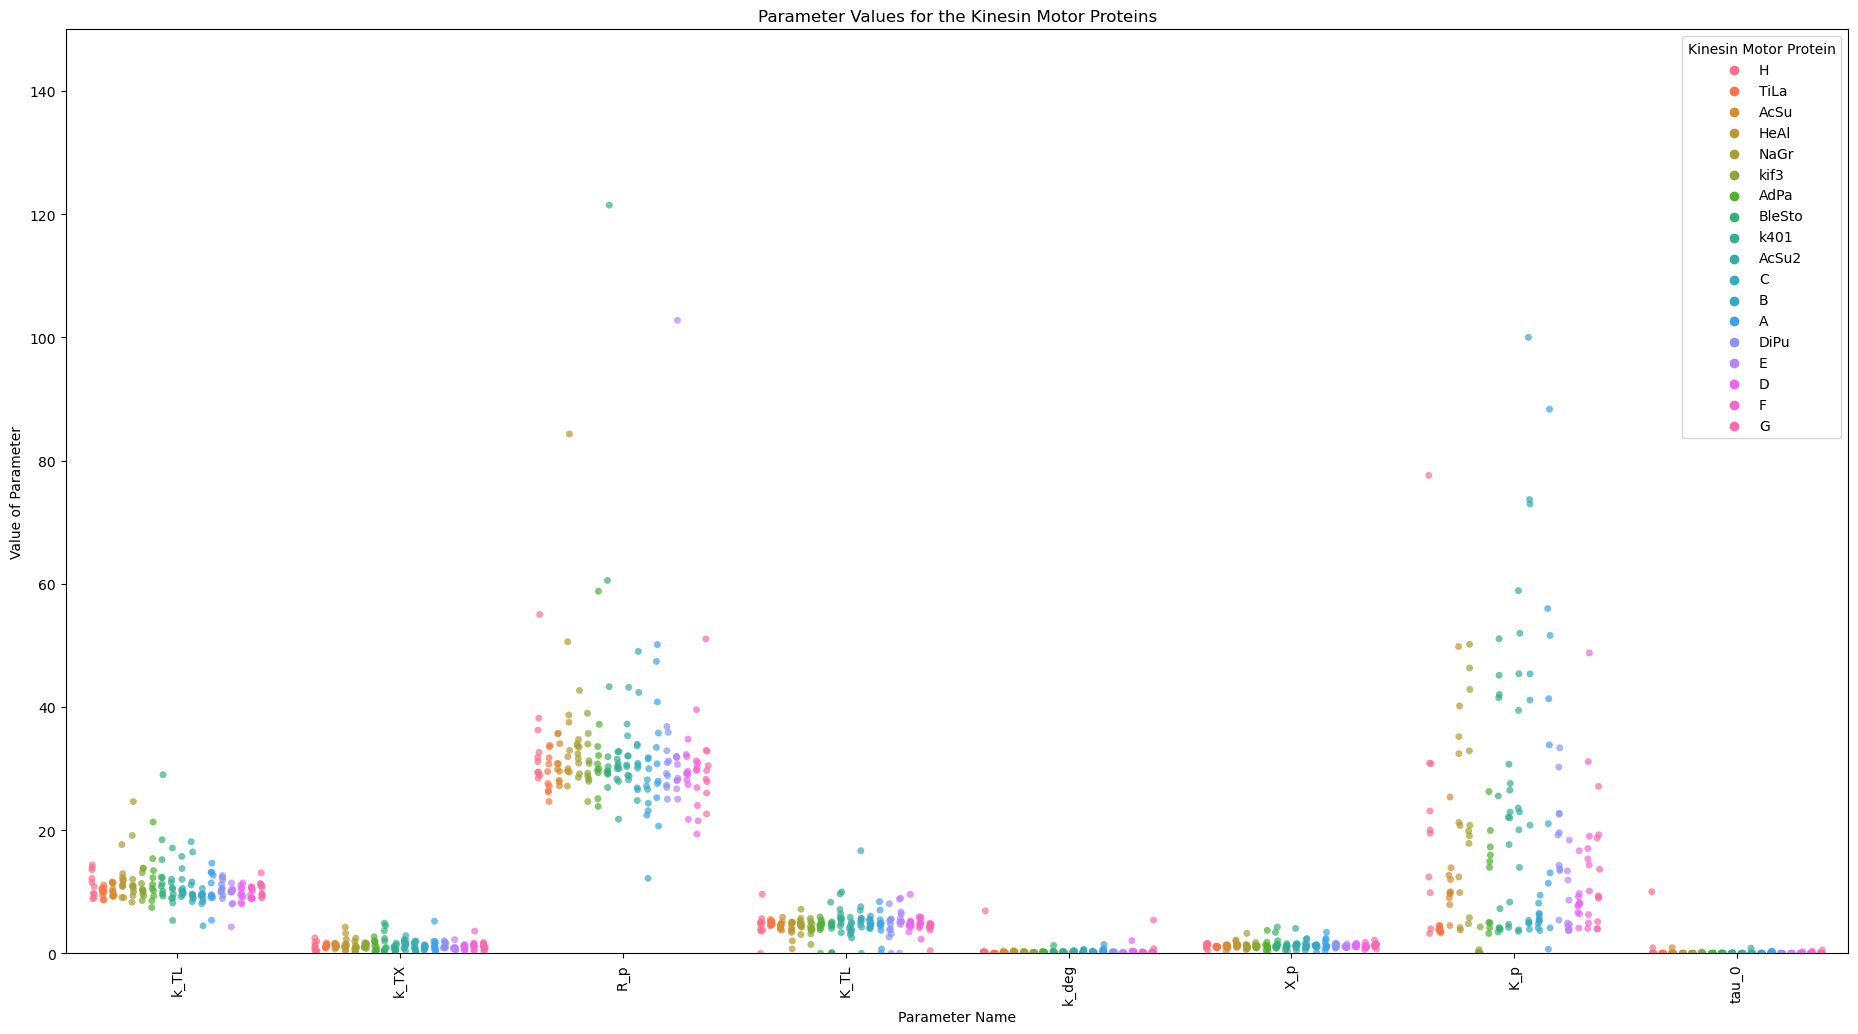

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


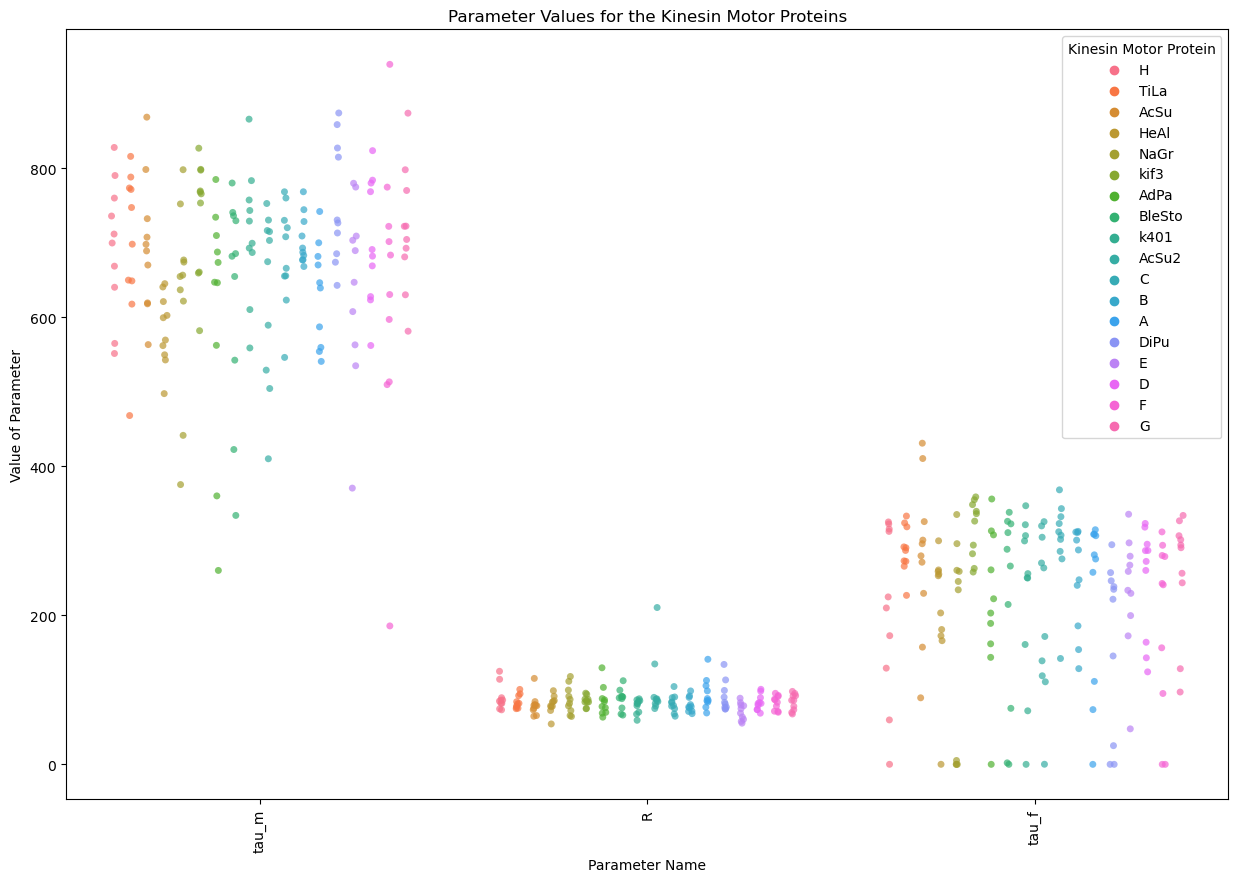

In [3]:
mp.showExperimentalDataTogether()
mp.showTheoreticalDataTogether()

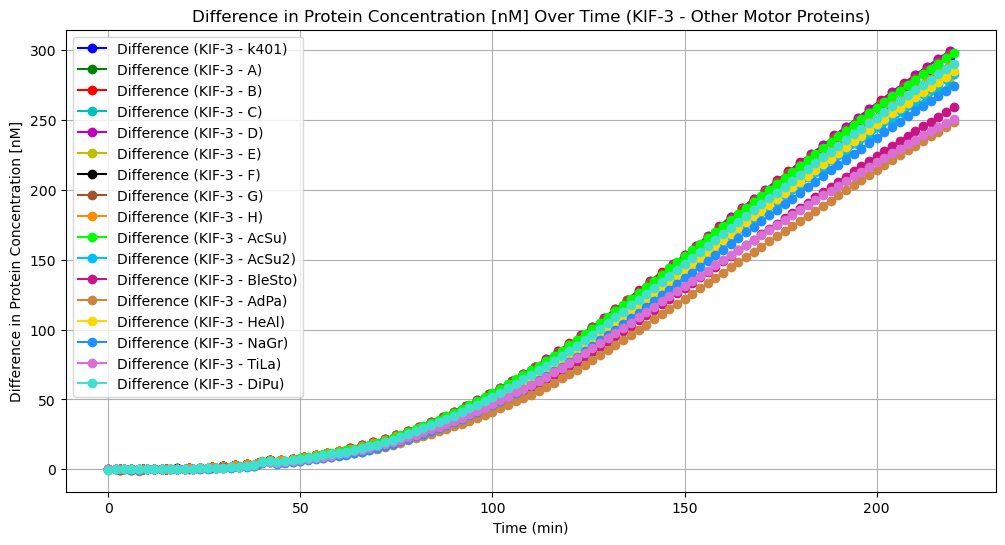

In [2]:
mp.plotProteinConcentrationDifference()

In [4]:
mp.compareTwoMotorProteins()

k_TL      13.841060
k_TX       1.669321
R_p       31.260083
tau_m    753.502179
K_TL       3.698506
R         83.806256
k_deg      0.171004
X_p        1.281157
K_p        0.584780
tau_0      0.051312
tau_f    355.158566
Name: 5, dtype: float64
k_TL     1.109247e+01
k_TX     1.662422e+00
R_p      2.465243e+01
tau_m    4.682156e+02
K_TL     5.246646e+00
R        9.222181e+01
k_deg    1.243934e-04
X_p      1.092838e+00
K_p      3.327327e+00
tau_0    2.525064e-07
tau_f    2.268294e+02
Name: 2, dtype: float64
For the BEST found model (model with the least SSE), this is the percentage change of the optimized parameters between  kif3  and  TiLa :

k_TL:   19.85822225658037%
k_TX:   0.41322934205489764%
R_p:   21.137683837258827%
tau_m:   37.86142027622568%
K_TL:   41.85852983132907%
R:   10.04167242850299%
k_deg:   99.92725695409425%
X_p:   14.699149884164584%
K_p:   468.98796061473325%
tau_0:   99.9995079029675%
tau_f:   36.132915828430534%
